<a href="https://colab.research.google.com/github/petarfinki/finki/blob/master/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stemmer.stem('stripes')

'stripe'

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import numpy as np
import pandas as pd

def read_corpus():
  sentences = np.concatenate((pd.read_table('/content/multinli_dev_set.txt')['sentence1'].values,
                              pd.read_table('/content/multinli_dev_set.txt')['sentence2'].values))
  
  labels = np.concatenate((pd.read_table('/content/multinli_dev_set.txt')['genre'].values,
                           pd.read_table('/content/multinli_dev_set.txt')['genre'].values))
  
  return sentences, labels
 

In [ ]:
read_corpus()

(array(['The new rights are nice enough',
        'This site includes a list of all award winners and a searchable database of Government Executive articles.',
        "uh i don't know i i have mixed emotions about him uh sometimes i like him but at the same times i love to see somebody beat him",
        ..., 'The FDA is set to conduct workshops. ',
        'Cirque du Soleil is an international troupe.',
        'I wont even bother listening.'], dtype=object),
 array(['slate', 'government', 'telephone', ..., 'government', 'travel',
        'telephone'], dtype=object))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Прикажување на зборовите со токенизација за зборови

In [ ]:
from nltk.tokenize import word_tokenize

data = read_corpus()[0]
words = np.array([])
for x in data:
    words = np.append(words, nltk.word_tokenize(x))
print(words)
#sekoj zbor od data go tokenizirame i go smestuvame vo prazna niza words

['The' 'new' 'rights' ... 'bother' 'listening' '.']


Големината на вокабуларот составен од овие зборови конкретно е:

In [ ]:
print(len(words))

362388


Најчестите 20 зборови односно карактери кои што се среќаваат се:

In [ ]:
fdist = nltk.FreqDist(words)
print(fdist)

for word, frequency in fdist.most_common(20):
    print(u'{} : {}'.format(word, frequency))

<FreqDist with 15966 samples and 362388 outcomes>
. : 17368
the : 15323
) : 10234
, : 10222
( : 10219
of : 8171
to : 8046
and : 7394
a : 6055
in : 4574
is : 3892
that : 3782
it : 3438
The : 3404
's : 3135
was : 2704
you : 2643
for : 2577
i : 2310
are : 2157


Направивме хистограм на кој што графички ги прикажуваме најфрекфентните 20 карактери.

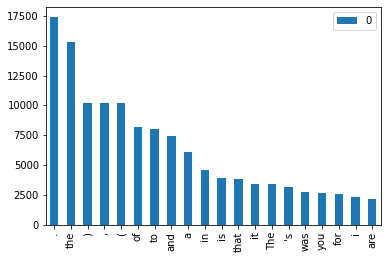

In [ ]:
import pandas as pd

twenty = fdist.most_common(20)
#print(twenty)
recnik = dict()
for el in twenty:
  recnik[el[0]] = el[1]

#print(recnik)
df = pd.DataFrame.from_dict(recnik, orient='index')
df.plot(kind='bar')

Е сега ги отстрануваме stopwords и интерпункциските знаци за да имаме подобра прегледност:

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

english_stops = set(stopwords.words('english'))
stopword = [word for word in words if word not in english_stops]
#GI BRISEME SITE INTERPUNKCISKI ZNACI(SITE KARAKTERI SO LENGTH=1)
bez_interpunkcija = words = [word for word in stopword if len(word) > 1]
#GI PODESUVAME SITE ZBOROVI DA SE LOWERCASE
lowercase_words = [word.lower() for word in bez_interpunkcija]

print(lowercase_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['the', 'new', 'rights', 'nice', 'enough', 'this', 'site', 'includes', 'list', 'award', 'winners', 'searchable', 'database', 'government', 'executive', 'articles', 'uh', "n't", 'know', 'mixed', 'emotions', 'uh', 'sometimes', 'like', 'times', 'love', 'see', 'somebody', 'beat', 'yeah', 'think', 'favorite', 'restaurant', 'always', 'one', 'closest', 'know', 'closest', 'long', "'s", 'meets', 'minimum', 'criteria', 'know', 'good', 'food', "n't", 'know', 'um', 'lot', 'camping', 'well', 'would', 'help', 'wish', 'would', 'got', 'little', 'landfill', 'space', 'left', "'re", 'going', 'run', 'end', 'decade', "'s", 'really', 'going', 'yeah', 'know', 'college', 'worked', 'calcutta', 'seems', 'production', 'center', 'pretensions', 'artistic', 'creativity', 'ironically', "'re", 'actually', 'likely', 'see', 'works', 'satyajit', 'ray', 'mrinal', 'sen', 'shown', 'europe', 'north', 'ameri

In [ ]:
print(len(lowercase_words))

182857


Можеме да видиме дека од кога направивме филтрирање големината на вокабуларот се намали на 182,857 зборови.Дури дупло помалку од колку пред филтрирањето.

In [ ]:
fdist_nova = nltk.FreqDist(lowercase_words)
print(fdist_nova)

for word, frequency in fdist_nova.most_common(20):
    print(u'{} : {}'.format(word, frequency))

<FreqDist with 14018 samples and 182857 outcomes>
the : 3411
's : 3138
n't : 1674
np : 1040
know : 971
uh : 914
one : 778
like : 730
it : 726
would : 715
in : 704
vp : 675
yeah : 630
there : 595
he : 584
well : 582
people : 579
think : 523
time : 504
they : 479


Во ќелијата горе можете да видите кои се најчестите зборови по филтрирањето а истото во прилог ќе го прикажам и на хистограм.

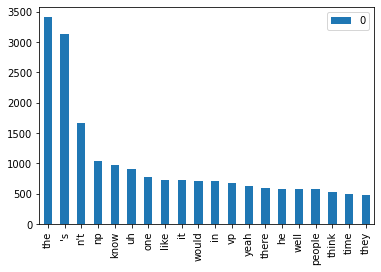

In [ ]:
import pandas as pd

twenty_novi = fdist_nova.most_common(20)
#print(twenty)
dictionary = dict()
for el in twenty_novi:
  dictionary[el[0]] = el[1]

#print(recnik)
df = pd.DataFrame.from_dict(dictionary, orient='index')
df.plot(kind='bar')

Сега ќе тестираме каква ќе биде фрекфенцијата на појавување доколку остраниме зборови кои се појавуваат помалку од k пати.

In [ ]:
from nltk import FreqDist
posledni = FreqDist(dict(fdist_nova.most_common()[-10:]))
print(dict(posledni))
    
#OVA E CISTO DA VIDIME KOI SE NAJRETKITE ZBOROVI

{'alot': 1, 'ideologies': 1, 'gulf': 1, 'irrationally': 1, 'colder': 1, 'outdated': 1, 'alberta': 1, 'parades': 1, 'focusing': 1, 'unaffected': 1}


Проверуваме најпрво за k=5 и успешно ги отстранивме зборовите.
Цело време работам со именици(dictionaries) , така ми е полесно а резултатот секако е ист.

In [ ]:
novo = dict(fdist_nova)
res = {k: v for k, v in novo.items() if v > 5}
print(res)
print(len(res))
#DOBIVME OKOLU 5800 ZBOROVI STO E SKORO POLOVINA OD PRED FILTRIRANJETO

{'the': 3411, 'new': 461, 'rights': 31, 'nice': 60, 'enough': 106, 'this': 266, 'site': 83, 'includes': 27, 'list': 32, 'award': 19, 'winners': 8, 'searchable': 6, 'database': 14, 'government': 235, 'executive': 52, 'articles': 17, 'uh': 914, "n't": 1674, 'know': 971, 'mixed': 7, 'emotions': 6, 'sometimes': 90, 'like': 730, 'times': 188, 'love': 42, 'see': 357, 'somebody': 37, 'beat': 13, 'yeah': 630, 'think': 523, 'favorite': 63, 'restaurant': 47, 'always': 257, 'one': 778, 'closest': 6, 'long': 234, "'s": 3138, 'meets': 9, 'minimum': 17, 'criteria': 15, 'good': 424, 'food': 67, 'um': 180, 'lot': 309, 'camping': 24, 'well': 582, 'would': 715, 'help': 184, 'wish': 28, 'got': 246, 'little': 201, 'landfill': 7, 'space': 44, 'left': 134, "'re": 433, 'going': 331, 'run': 59, 'end': 97, 'decade': 11, 'really': 351, 'college': 57, 'worked': 48, 'calcutta': 19, 'seems': 63, 'production': 33, 'center': 77, 'ironically': 6, 'actually': 108, 'likely': 66, 'works': 39, 'mrinal': 6, 'sen': 9, 'sho

Доколку земеме за k=20:

In [ ]:
novo = dict(fdist_nova)
res = {k: v for k, v in novo.items() if v > 20}
print(res)
print(len(res))
#MOZEME DA VIDIME DEKA SO NAD 20 POJAVUVANJA IMAME OKOLU 1600 ZBOROVI

{'the': 3411, 'new': 461, 'rights': 31, 'nice': 60, 'enough': 106, 'this': 266, 'site': 83, 'includes': 27, 'list': 32, 'government': 235, 'executive': 52, 'uh': 914, "n't": 1674, 'know': 971, 'sometimes': 90, 'like': 730, 'times': 188, 'love': 42, 'see': 357, 'somebody': 37, 'yeah': 630, 'think': 523, 'favorite': 63, 'restaurant': 47, 'always': 257, 'one': 778, 'long': 234, "'s": 3138, 'good': 424, 'food': 67, 'um': 180, 'lot': 309, 'camping': 24, 'well': 582, 'would': 715, 'help': 184, 'wish': 28, 'got': 246, 'little': 201, 'space': 44, 'left': 134, "'re": 433, 'going': 331, 'run': 59, 'end': 97, 'really': 351, 'college': 57, 'worked': 48, 'seems': 63, 'production': 33, 'center': 77, 'actually': 108, 'likely': 66, 'works': 39, 'shown': 31, 'europe': 27, 'north': 64, 'america': 86, 'india': 31, 'if': 177, 'pay': 150, 'security': 82, 'limited': 42, 'could': 431, 'buy': 84, 'put': 142, 'price': 47, 'profit': 25, 'shares': 22, 'less': 124, 'whatever': 53, 'cost': 182, 'rise': 24, 'rules'

Направив една ваква табела каде што го најдов коренот на секој збор и со стемирање и со лематизација.
Првата колона е зборот каков што е даден во датасетот.Втората е коренот добиен со PorterStemmer.Третата е коренот добиен со WordNetLemmatizer.

In [ ]:
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer

print("{0:20}{1:20}{2:20}".format("Word","Stemmer","Lemmatizer"))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
for word in lowercase_words:
  print("{0:20}{1:20}{2:20}".format(word,stemmer.stem(word),lemmatizer.lemmatize(word)))
   
   

Streaming output truncated to the last 5000 lines.
ski                 ski                 ski                 
centre              centr               centre              
smallest            smallest            smallest            
artificial          artifici            artificial          
ski                 ski                 ski                 
slope               slope               slope               
europe              europ               europe              
know                know                know                
exactly             exactli             exactly             
weather             weather             weather             
like                like                like                
lewisville          lewisvil            lewisville          
the                 the                 the                 
information         inform              information         
obtained            obtain              obtained            
gao                 gao           

Прво ќе видиме со стемирање. Во првиот принт ги имаме сите зборови стемирани. Потоа во втората линија ја гледаме големината на вокабуларот.

In [ ]:
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer

stemmer = PorterStemmer()
lista = list()
for word in lowercase_words:
  rootWord = stemmer.stem(word)
  lista.append(rootWord)

print(lista)
print(len(lista))

['the', 'new', 'right', 'nice', 'enough', 'thi', 'site', 'includ', 'list', 'award', 'winner', 'searchabl', 'databas', 'govern', 'execut', 'articl', 'uh', "n't", 'know', 'mix', 'emot', 'uh', 'sometim', 'like', 'time', 'love', 'see', 'somebodi', 'beat', 'yeah', 'think', 'favorit', 'restaur', 'alway', 'one', 'closest', 'know', 'closest', 'long', "'s", 'meet', 'minimum', 'criteria', 'know', 'good', 'food', "n't", 'know', 'um', 'lot', 'camp', 'well', 'would', 'help', 'wish', 'would', 'got', 'littl', 'landfil', 'space', 'left', "'re", 'go', 'run', 'end', 'decad', "'s", 'realli', 'go', 'yeah', 'know', 'colleg', 'work', 'calcutta', 'seem', 'product', 'center', 'pretens', 'artist', 'creativ', 'iron', "'re", 'actual', 'like', 'see', 'work', 'satyajit', 'ray', 'mrinal', 'sen', 'shown', 'europ', 'north', 'america', 'india', 'if', 'investor', 'will', 'pay', 'extra', 'secur', 'limit', 'downsid', 'could', 'buy', 'put', 'option', 'strike', 'price', '98', 'would', 'lock', 'profit', 'share', '18', 'less

Сега ќе видиме за секој збор колку пати се појавува односно ќе ја прикажам фрекфенцијата за секој корен

In [ ]:
fds = nltk.FreqDist(lista)
print(dict(fds))


{'the': 3411, 'new': 461, 'right': 377, 'nice': 68, 'enough': 106, 'thi': 266, 'site': 124, 'includ': 227, 'list': 51, 'award': 26, 'winner': 15, 'searchabl': 6, 'databas': 14, 'govern': 272, 'execut': 111, 'articl': 32, 'uh': 914, "n't": 1674, 'know': 1029, 'mix': 22, 'emot': 29, 'sometim': 90, 'like': 843, 'time': 699, 'love': 84, 'see': 380, 'somebodi': 37, 'beat': 17, 'yeah': 630, 'think': 581, 'favorit': 63, 'restaur': 101, 'alway': 257, 'one': 824, 'closest': 6, 'long': 234, "'s": 3138, 'meet': 83, 'minimum': 17, 'criteria': 15, 'good': 486, 'food': 84, 'um': 180, 'lot': 342, 'camp': 49, 'well': 582, 'would': 715, 'help': 243, 'wish': 38, 'got': 246, 'littl': 201, 'landfil': 7, 'space': 45, 'left': 134, "'re": 433, 'go': 663, 'run': 120, 'end': 155, 'decad': 23, 'realli': 351, 'colleg': 63, 'work': 432, 'calcutta': 19, 'seem': 172, 'product': 172, 'center': 91, 'pretens': 3, 'artist': 27, 'creativ': 10, 'iron': 21, 'actual': 129, 'satyajit': 4, 'ray': 4, 'mrinal': 6, 'sen': 9, 's

Ги претставуваме на график најфрекфентните 20 зборови од вокабуларот.

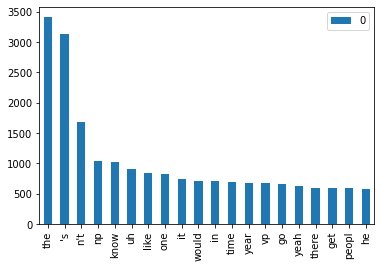

In [ ]:
import pandas as pd

najcesti = fds.most_common(20)
najcesti_dict = dict(najcesti)

df = pd.DataFrame.from_dict(najcesti_dict, orient='index')
df.plot(kind='bar')

Истиот процес сега го правиме за лематизација.Најпрво ги имаме сите зборови со нивниот лематизиран корен и големината на тој вокабулар.

In [ ]:
from nltk import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lista = list()
for word in lowercase_words:
  rootWord = lemmatizer.lemmatize(word)
  lista.append(rootWord)

print(lista)
print(len(lista))

['the', 'new', 'right', 'nice', 'enough', 'this', 'site', 'includes', 'list', 'award', 'winner', 'searchable', 'database', 'government', 'executive', 'article', 'uh', "n't", 'know', 'mixed', 'emotion', 'uh', 'sometimes', 'like', 'time', 'love', 'see', 'somebody', 'beat', 'yeah', 'think', 'favorite', 'restaurant', 'always', 'one', 'closest', 'know', 'closest', 'long', "'s", 'meet', 'minimum', 'criterion', 'know', 'good', 'food', "n't", 'know', 'um', 'lot', 'camping', 'well', 'would', 'help', 'wish', 'would', 'got', 'little', 'landfill', 'space', 'left', "'re", 'going', 'run', 'end', 'decade', "'s", 'really', 'going', 'yeah', 'know', 'college', 'worked', 'calcutta', 'seems', 'production', 'center', 'pretension', 'artistic', 'creativity', 'ironically', "'re", 'actually', 'likely', 'see', 'work', 'satyajit', 'ray', 'mrinal', 'sen', 'shown', 'europe', 'north', 'america', 'india', 'if', 'investor', 'willing', 'pay', 'extra', 'security', 'limited', 'downside', 'could', 'buy', 'put', 'option',

Ги наоѓаме соодветните фрекфенции од вокабуларот од корени со лематизација.

In [ ]:
fdslem = nltk.FreqDist(lista)
print(dict(fdslem))

{'the': 3411, 'new': 461, 'right': 376, 'nice': 60, 'enough': 106, 'this': 266, 'site': 124, 'includes': 27, 'list': 39, 'award': 20, 'winner': 15, 'searchable': 6, 'database': 14, 'government': 252, 'executive': 90, 'article': 32, 'uh': 914, "n't": 1674, 'know': 1017, 'mixed': 7, 'emotion': 9, 'sometimes': 90, 'like': 742, 'time': 692, 'love': 48, 'see': 358, 'somebody': 37, 'beat': 13, 'yeah': 630, 'think': 541, 'favorite': 63, 'restaurant': 101, 'always': 257, 'one': 824, 'closest': 6, 'long': 234, "'s": 3138, 'meet': 46, 'minimum': 17, 'criterion': 18, 'good': 483, 'food': 84, 'um': 180, 'lot': 342, 'camping': 27, 'well': 582, 'would': 715, 'help': 199, 'wish': 28, 'got': 246, 'little': 201, 'landfill': 7, 'space': 44, 'left': 134, "'re": 433, 'going': 331, 'run': 85, 'end': 116, 'decade': 18, 'really': 351, 'college': 63, 'worked': 48, 'calcutta': 19, 'seems': 63, 'production': 34, 'center': 87, 'pretension': 3, 'artistic': 3, 'creativity': 3, 'ironically': 6, 'actually': 108, 'li

Ги претставуваме на график најфрекфентните 20 зборови.

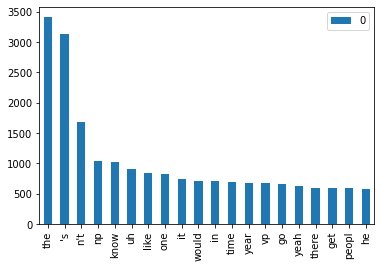

In [ ]:
import pandas as pd

najcestilem = fds.most_common(20)
najcestilem_dict = dict(najcestilem)

df = pd.DataFrame.from_dict(najcestilem_dict, orient='index')
df.plot(kind='bar')

Задача 2. 

Со countvectorizer доделуваме вредности 0 и 1 од оригиналниот датасет најгоре.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data).toarray()

Лабелите(класите) ги ставаме во променливата y и го тренираме моделот соодветно 80/20 со RandomForestClassifier(тој го учевме на предметот вештачка интелигенција и со него знам да работам)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

y = read_corpus()[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

За барањата за тестирање конкретно во оваа задача видов дека можам директно да ги искористам готови accuracy_score,confusion_matrix и истите ги импортирав од sklearn.metics. Резултатите се во прилог:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[731   4  12  48  14]
 [ 45 643  17  22  41]
 [ 89  19 572  49  58]
 [ 74   9  23 639  29]
 [ 58   8  32  29 694]]
              precision    recall  f1-score   support

     fiction       0.73      0.90      0.81       809
  government       0.94      0.84      0.89       768
       slate       0.87      0.73      0.79       787
   telephone       0.81      0.83      0.82       774
      travel       0.83      0.85      0.84       821

    accuracy                           0.83      3959
   macro avg       0.84      0.83      0.83      3959
weighted avg       0.84      0.83      0.83      3959

0.8282394544076787


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')